# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-process dataset
- Import the dataframe - from before all the added columns (`df4`).

In [3]:
df = pd.read_csv('df4.csv')

In [4]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
881    0
882    0
883    0
884    0
885    0
Name: target, Length: 886, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 32 columns):
Unnamed: 0                                     886 non-null int64
Grade Average 7                                886 non-null int64
Grade Average 8                                886 non-null int64
Math_7_score                                   886 non-null int64
ELA_7_score                                    886 non-null int64
Math_8_score                                   886 non-null int64
ELA_8_score                                    886 non-null int64
Absent Grade 7                                 886 non-null int64
Tardy Grade 7                                  886 non-null int64
Absent Grade 8                                 886 non-null int64
Tardy Grade 8                                  886 non-null int64
Gender                                         886 non-null object
target                                         886 non-null int64
Absent Total                        

In [6]:
df1 = df.drop(['Comments', 'Unnamed: 0'], axis=1)

- Add features to `df1` where all positive comments are added together and all negative comments are added together.

In [ ]:
df1['positive comments'] = (df1['Num of Above Average Comments']+df1['Num of Meets Acceptable Comments']+
                           + df1['Num of Conscientious Comments'])
df1['negative comments'] = (df1['Num of Incomplete Work Comments']+df1['Num of Inattentive in Class Comments']+
                           df1['Num of Poor Tests Comments'])

**Checking distribution of dataset (df)**
- Mostly categorical
- Absent 7 and 8 along with tardy 7 and 8 are all negatively skewed

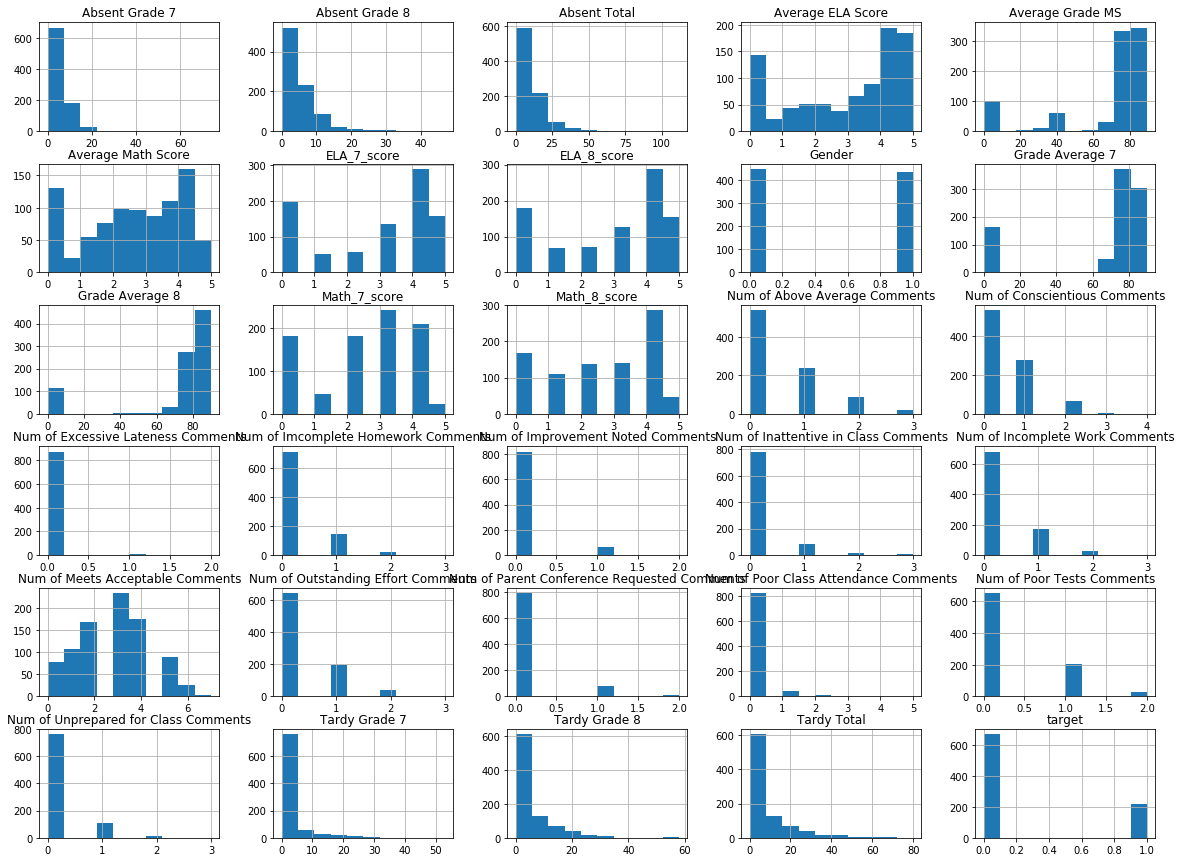

In [17]:
df1.hist(figsize=(20,15));

# Comparing with Target
Note: 
- target = 1 (Accepted) 
- target = 0 (Not Accepted)

### Question 1:
- How many of each target does the dataset have?

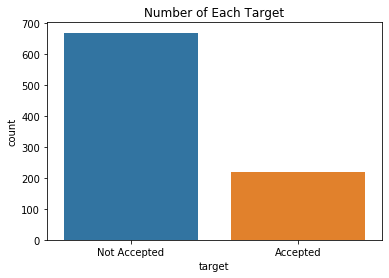

In [11]:
sns.countplot(x='target', data=df1)
positions = (0, 1)
labels = ('Not Accepted', 'Accepted')
plt.xticks(positions, labels);
plt.title('Number of Each Target');

### Question 2:
- What is the number of students that have "Above Average Comments" in each target?

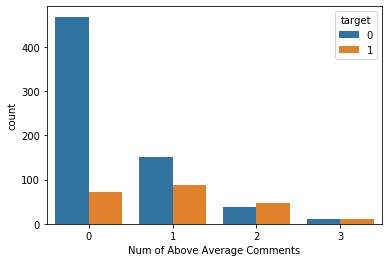

In [76]:
sns.countplot(x = 'Num of Above Average Comments', hue = 'target', data = df1);

**What does this graph tell us?** (Above)
- The number of above average comments is the highest comment a student can receive.  

### Question 3: 
- What scores did students show to have to be accepted into the STEM academy?

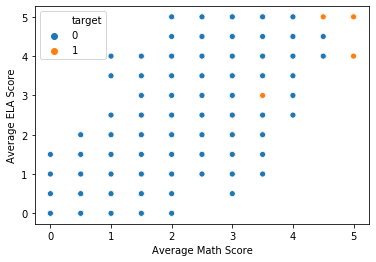

In [11]:
sns.scatterplot(x='Average Math Score', y='Average ELA Score', hue='target', data=df1);

**What does this graph tell us?** (Above)
- It shows that the majority of students with average scores between 0 and 3 were not accepted.  Only students who score an average of 3.5 or above were accepted.

## Average State Test Scores

### Question 4:
- What is the number of students that are accepted and not accepted and their average math score?

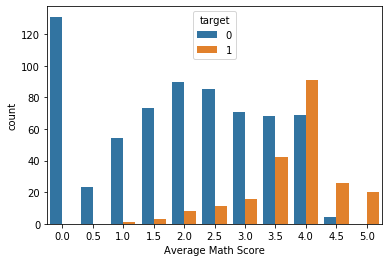

In [18]:
sns.countplot(x = 'Average Math Score', hue = 'target', data = df1);

**What does this graph tell us?** (Above)
- The graph shows that there are no students who received a 0 on both 7th and 8th grade math tests who were accepted into the STEM academy.  The highest average score of the students who were accepted was a 4.  There are no students who received an average of 5 that are not attending the STEM academy.  There are students who did not pass the math section of the test attending the STEM Academy (below 4).

### Question 5:
- What is the number of students that are accepted and not accepted and their average ELA score?

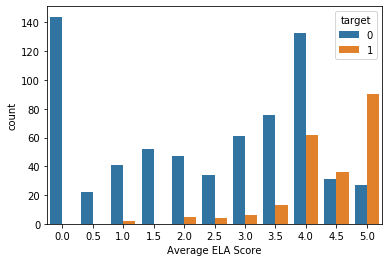

In [19]:
sns.countplot(x = 'Average ELA Score', hue = 'target', data = df1);

**What does this graph tell us?** (Above)
- There are students who passed the ELA test, who are not attending the STEM academy.

#### Comparing both graphs:
- STEM stands for Science, Technology, Engineering, and Mathematics.  The school is geared more towards these subjects, with not a great emphasis on liberal arts, though taught because of requirements.  Looking at the comparison of the graphs, it shows that students who excelled in the math portion of the state test are attending the STEM academy compared to students who excelled in the ELA portion of the state test.  Students who generally excel in math are more suited for the academy standards.  

### Question 6:
- What's the difference in gender of students who are accepted and not accepted into the STEM academy?

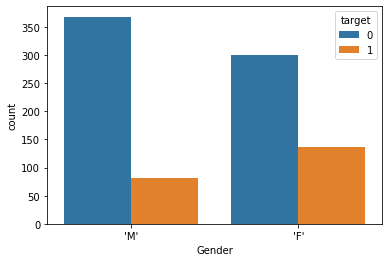

In [15]:
sns.countplot(x = 'Gender', hue = 'target', data = df1);

**What does the graph tell us?** (Above)
- Way more females are accepted into the STEM Academy than there are males.  The regular high school as more male attendees.

### Question 7:
- Looking at both schools, can we say that the STEM academy has students who have above average grades?

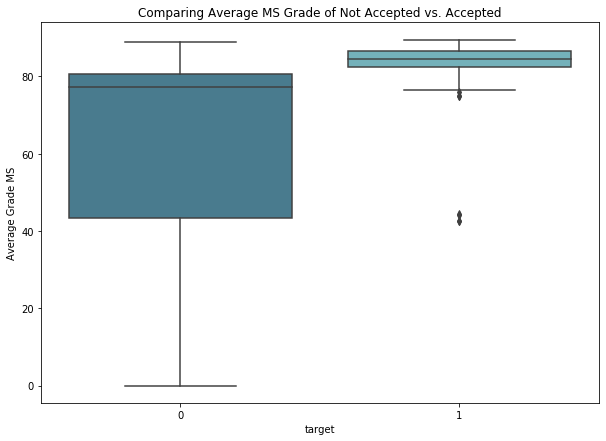

In [66]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'target', y = 'Average Grade MS', 
            data = df1, palette = 'GnBu_d').set_title('Comparing Average MS Grade of Not Accepted vs. Accepted')
plt.show()

**What does this graph tell us?** (Above)
- The average grade for students in the academy is above an 80 where the students (except for 2) range between high 70's and 90's.  Compared to the students in the regular high school who range from a 0 to 90's.

# Comparing with Gender

### Question 1:
- Difference between boys and girls in Grades.

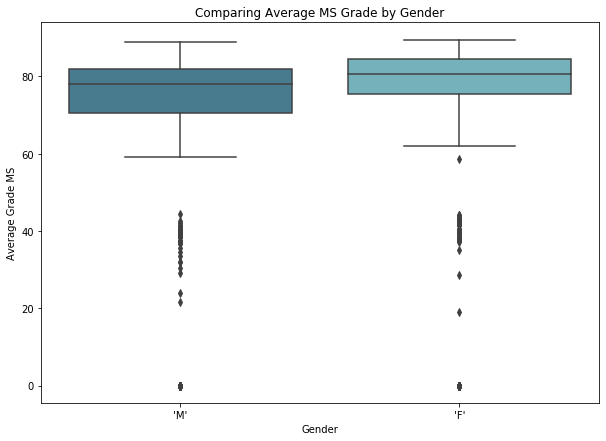

In [83]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender', y = 'Average Grade MS', 
            data = df1, palette = 'GnBu_d').set_title('Comparing Average MS Grade by Gender')
plt.show()

### Question 2:
- Difference between boys and girls in Math Scores

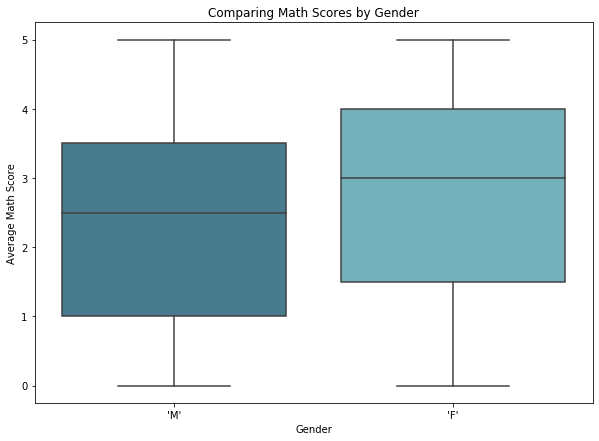

In [86]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender', y = 'Average Math Score', 
            data = df1, palette = 'GnBu_d').set_title('Comparing Math Scores by Gender')
plt.show()

### Question 3:
- Difference between boys and girls in ELA scores.

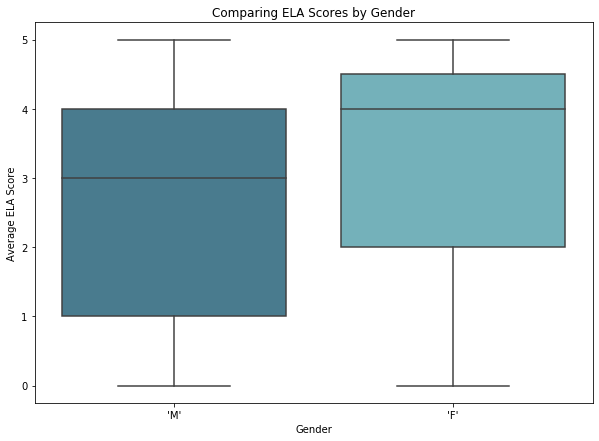

In [87]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender', y = 'Average ELA Score', 
            data = df1, palette = 'GnBu_d').set_title('Comparing ELA Scores by Gender')
plt.show()

### Conclusions:
- This could be an indication of why there are more females accepted into the STEM academy over boys.  Girls out performed boys in grades and positive comments. 

# Comparing with Comments

### Question 1:
- Is there a correlation between number of positive and negative comments average grade?

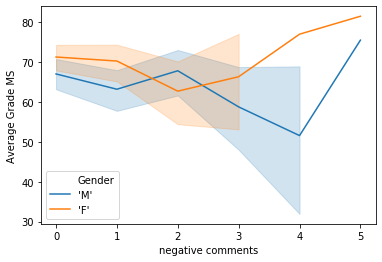

In [78]:
sns.lineplot(x="negative comments", y='Average Grade MS', hue="Gender",
                  data=df1)

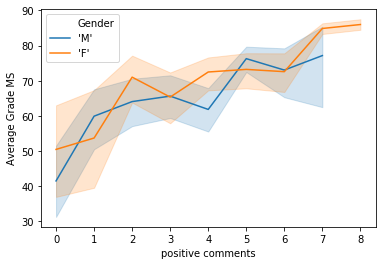

In [79]:
sns.lineplot(x="positive comments", y='Average Grade MS', hue="Gender",
                  data=df1)

#### Comparing the graphs
- Looking at the negative comments, for both girls and boys, it doesn't seem to really affect they're average grade.  Even though they received more negative comments, they were still achieving high grades.  Even though boys did show a dip, when they received more negative comments, their grade suffered, but not overall.
- For positive comments, it does show that the more positive comments a student receives, the higher their grade can be.  
    - But comparing with the negative graph, I feel like it cancels it out.

### Question 2:
- What can we see of the number of positive and negative comments with gender?

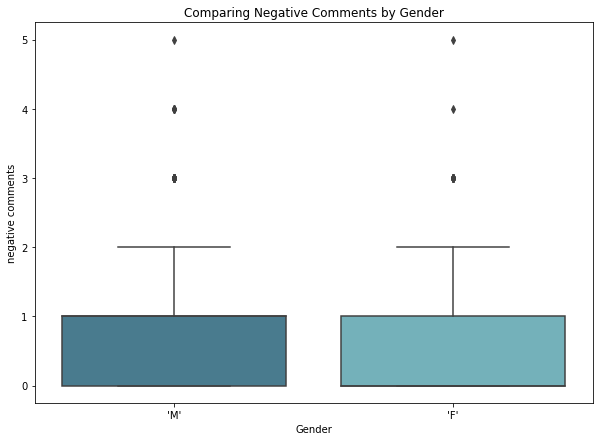

In [80]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender', y = 'negative comments', 
            data = df1, palette = 'GnBu_d').set_title('Comparing Negative Comments by Gender')
plt.show()

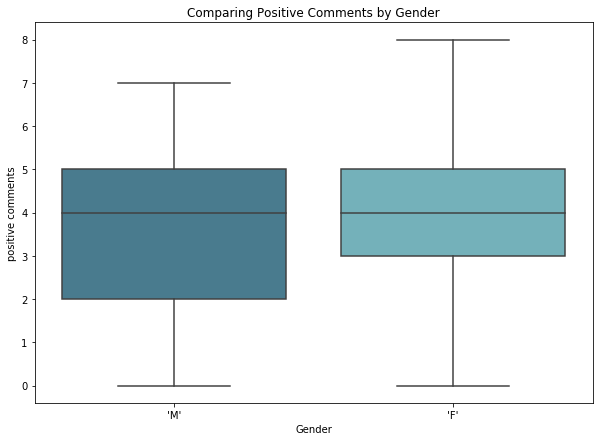

In [81]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Gender', y = 'positive comments', 
            data = df1, palette = 'GnBu_d').set_title('Comparing Positive Comments by Gender')
plt.show()

#### Comparing the graphs
- Overall, between the boys and the girls, they both received on average about the same amount of positive and negative comments.  The boys showed that they received less overall positive comments where the girls hovered between 3 to 5 positive comments.